# Exercise Nine: Numbers

Had some initial issues locating the data, mostly because everything I found was labeled "R3" rather than "R1." I finally realized it was just a different release!

I wasn't entirely sure why different years broke so much. So I just used 2016 like the example.

## Steps 1 and 2: Importing Data 

In [43]:
import pandas as pd

columns = ['id', 'year', 'age', 'sex', 'race', 'degree', 'prfmnce','artexbt']
df = pd.read_stata("GSS7218_R3.dta", columns=columns)

df = df.loc[df['year'].isin({2016})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race       degree prfmnce artexbt
59599     1  2016  47.0    male  white     bachelor     NaN     NaN
59600     2  2016  61.0    male  white  high school     NaN     NaN
59601     3  2016  72.0    male  white     bachelor     yes      no
59602     4  2016  43.0  female  white  high school     NaN     NaN
59603     5  2016  55.0  female  white     graduate      no     yes
...     ...   ...   ...     ...    ...          ...     ...     ...
62461  2863  2016  57.0  female  white     graduate     NaN     NaN
62462  2864  2016  77.0    male  white  high school     NaN     NaN
62463  2865  2016  87.0  female  white  high school      no      no
62464  2866  2016  55.0  female  white  high school     NaN     NaN
62465  2867  2016  72.0    male  white     bachelor      no     yes

[2867 rows x 8 columns]>


In [14]:
df = df.loc[df['prfmnce'].notna()]

df = df.loc[df['age'].notna()]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree prfmnce artexbt
59601     3  2016  72.0    male  white        bachelor     yes      no
59603     5  2016  55.0  female  white        graduate      no     yes
59606     8  2016  23.0  female  other     high school      no      no
59608    10  2016  71.0    male  white  junior college     yes      no
59609    11  2016  33.0  female  black     high school      no      no
...     ...   ...   ...     ...    ...             ...     ...     ...
62456  2858  2016  41.0  female  white     high school      no      no
62458  2860  2016  57.0    male  white     high school      no      no
62460  2862  2016  75.0  female  white     high school     yes      no
62463  2865  2016  87.0  female  white     high school      no      no
62465  2867  2016  72.0    male  white        bachelor      no     yes

[1462 rows x 8 columns]>


## Step 3: Quantitative Data Aspects

49.15575778788939


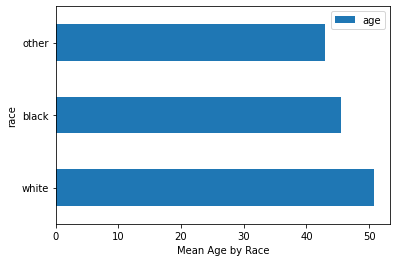

In [44]:
df = df.replace('89 or older', 89)
df['age'] = pd.to_numeric(df['age'])
print(df['age'].mean())

import matplotlib.pyplot as plt
df.groupby('race')['age'].mean().plot(kind='barh')
plt.xlabel('Mean Age by Race')
plt.legend();

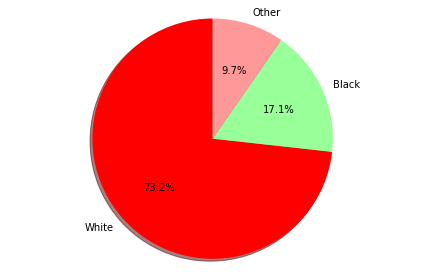

In [45]:
race_counts = df['race'].value_counts()
labels = ["White", "Black", "Other"]
colors = ["#FF0000", "#99FF99", "#FF9999"]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(race_counts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Step 4: GroupBy Arguments

In [46]:
degree_race = df.groupby('degree')['race'].value_counts()
degree_race

degree               
lt high school  white     197
                other      71
                black      60
high school     white    1057
                black     292
                other     112
junior college  white     166
                black      33
                other      17
bachelor        white     426
                black      71
                other      39
graduate        white     250
                other      37
                black      31
Name: race, dtype: int64

In [47]:
exhibition_by_race = df.groupby('artexbt')['race'].value_counts()
exhibition_by_race

artexbt       
yes      white    394
         black     56
         other     31
no       white    689
         black    202
         other     97
Name: race, dtype: int64

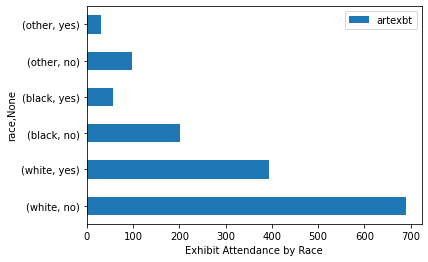

In [50]:
df.groupby('race')['artexbt'].value_counts().plot(kind='barh')
plt.xlabel('Exhibit Attendance by Race')
plt.legend();